In [0]:
import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [0]:
#1. Do homes with air conditioning have a higher sales price than homes without air conditioning?
#Read the data
housepx=pd.read_csv("https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/homeprices.applied.econ.csv")
housepx.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,66000.0,3880,3,2,2,yes,no,yes,no,no,2,no
2,83800.0,4800,3,1,1,yes,yes,yes,no,no,0,no
3,45000.0,3986,2,2,1,no,yes,yes,no,no,1,no
4,65900.0,4510,4,2,2,yes,no,yes,no,no,0,no


In [0]:
aircon_yes=housepx[(housepx['airco']=='yes')]
aircon_yes.info()
aircon_no=housepx[(housepx['airco']=='no')]
aircon_no.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173 entries, 373 to 545
Data columns (total 12 columns):
price       173 non-null float64
lotsize     173 non-null int64
bedrooms    173 non-null int64
bathrms     173 non-null int64
stories     173 non-null int64
driveway    173 non-null object
recroom     173 non-null object
fullbase    173 non-null object
gashw       173 non-null object
airco       173 non-null object
garagepl    173 non-null int64
prefarea    173 non-null object
dtypes: float64(1), int64(5), object(6)
memory usage: 17.6+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 373 entries, 0 to 372
Data columns (total 12 columns):
price       373 non-null float64
lotsize     373 non-null int64
bedrooms    373 non-null int64
bathrms     373 non-null int64
stories     373 non-null int64
driveway    373 non-null object
recroom     373 non-null object
fullbase    373 non-null object
gashw       373 non-null object
airco       373 non-null object
garagepl    373 non-null int

(array([ 48., 131.,  99.,  50.,  29.,   6.,   4.,   4.,   1.,   1.]),
 array([ 25000.,  40000.,  55000.,  70000.,  85000., 100000., 115000.,
        130000., 145000., 160000., 175000.]),
 <a list of 10 Patch objects>)

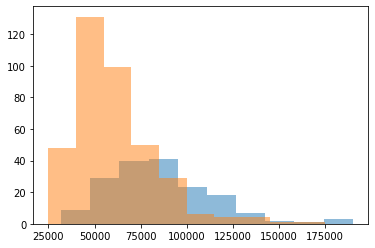

In [0]:
# normal distribution? Check with histogram
plt.hist(aircon_yes['price'], alpha= .5)
plt.hist(aircon_no['price'], alpha= .5)

In [0]:
print(stats.describe(aircon_yes['price']))
print(stats.describe(aircon_no['price']))

DescribeResult(nobs=173, minmax=(31900.0, 190000.0), mean=85880.58959537573, variance=810167352.2317516, skewness=0.8558523643779228, kurtosis=0.9609338749117713)
DescribeResult(nobs=373, minmax=(25000.0, 175000.0), mean=59884.85254691689, variance=455341800.98626363, skewness=1.4196100209360347, kurtosis=3.448225770991252)


In [0]:
# the kurtosis is too high so we cannot move on

In [0]:
stats.ttest_ind(aircon_yes['price'],aircon_no['price'])

Ttest_indResult(statistic=11.862852780650169, pvalue=4.972721571759431e-29)

In [0]:
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

get_95_ci(aircon_yes['price'], aircon_no['price'])

'The difference in means at the 95% confidence interval (two-tail) is between -30758.09492994282 and -21233.379166974857.'

In [0]:
# We can say that with 95% counfidence interval that houses without aircon are lower priced (between 30,759 and 21,233) compared to houses with aircon.

In [0]:
#2. Do homes with a full basement have a higher sales price than homes without a full basement?
fullbase_yes=housepx[(housepx['fullbase']=='yes')]
fullbase_yes.info()
fullbase_no=housepx[(housepx['fullbase']=='no')]
fullbase_no.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 0 to 438
Data columns (total 12 columns):
price       191 non-null float64
lotsize     191 non-null int64
bedrooms    191 non-null int64
bathrms     191 non-null int64
stories     191 non-null int64
driveway    191 non-null object
recroom     191 non-null object
fullbase    191 non-null object
gashw       191 non-null object
airco       191 non-null object
garagepl    191 non-null int64
prefarea    191 non-null object
dtypes: float64(1), int64(5), object(6)
memory usage: 19.4+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 355 entries, 125 to 545
Data columns (total 12 columns):
price       355 non-null float64
lotsize     355 non-null int64
bedrooms    355 non-null int64
bathrms     355 non-null int64
stories     355 non-null int64
driveway    355 non-null object
recroom     355 non-null object
fullbase    355 non-null object
gashw       355 non-null object
airco       355 non-null object
garagepl    355 non-null int

(array([ 55., 119.,  80.,  44.,  30.,  16.,   7.,   2.,   0.,   2.]),
 array([ 25000.,  41500.,  58000.,  74500.,  91000., 107500., 124000.,
        140500., 157000., 173500., 190000.]),
 <a list of 10 Patch objects>)

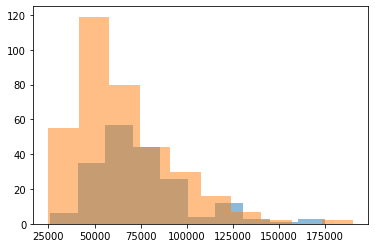

In [0]:
# normal distribution? Check with histogram
plt.hist(fullbase_yes['price'], alpha= .5)
plt.hist(fullbase_no['price'], alpha= .5)

In [0]:
print(stats.describe(fullbase_yes['price']))
print(stats.describe(fullbase_no['price']))

DescribeResult(nobs=191, minmax=(26000.0, 175000.0), mean=74894.50261780104, variance=687483535.4092036, skewness=1.299439350765169, kurtosis=2.200944427832982)
DescribeResult(nobs=355, minmax=(25000.0, 190000.0), mean=64477.58309859155, variance=690693014.1816344, skewness=1.2539001276811907, kurtosis=1.9898502593432044)


In [0]:
stats.ttest_ind(fullbase_yes['price'],fullbase_no['price'])

Ttest_indResult(statistic=4.420628512286621, pvalue=1.1885626562866786e-05)

In [0]:
get_95_ci(fullbase_yes['price'], fullbase_no['price'])

'The difference in means at the 95% confidence interval (two-tail) is between -15032.294775656886 and -5801.544262762097.'

In [0]:
#at 95%confidence interval, the houses without a full basement have prices loser (by between 15,032 and 5801 ) than houses with a full basement.